## __Homework_5__

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# _Task 1_

Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

In [2]:
import time

In [3]:
rand = np.random.rand(1000)
s_time = time.time()
weight = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
csum = weight.cumsum()
v = rand*csum[-1]
s = csum[-2]
for i in range(len(weight)-1,-1,-1):
    m = (s<v)&(v<csum[i])
    if i != 0:
        s -= weight[i-1]
    v[m] = i
print("%s seconds" % (time.time() - s_time))

0.001344919204711914 seconds


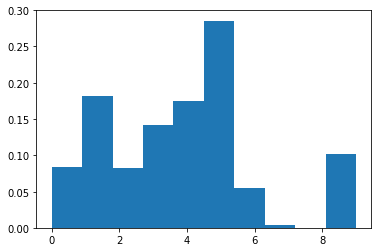

In [4]:
plt.hist(v,density=True)
plt.show()

In [5]:
np.sort(weight)
s_time = time.time()
weight = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
csum = weight.cumsum()
v = rand*csum[-1]
s = csum[-2]
for i in range(len(weight)-1,-1,-1):
    m = (s<v)&(v<csum[i])
    if i != 0:
        s -= weight[i-1]
    v[m] = i
print("%s seconds" % (time.time() - s_time))

0.0013661384582519531 seconds


Время довольно сильно зависело от конкретного запуска. В среднем происходит незначительное улучшение.

# _Task 2_

Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

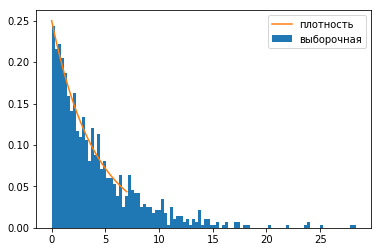

In [6]:
lambd=0.25
rand=np.random.rand(1000)
rand=-np.log(1-rand)/lambd
plt.hist(rand, bins=100, density=True, label='выборочная')
plt.plot(np.arange(700)/100,np.exp(-np.arange(700)*lambd/100)*lambd, label='плотность')
plt.legend()
plt.show()

# _Task 3_

Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

In [7]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
a=np.empty(0, dtype=float)
s=0
while s<1000:
    x=(np.random.rand()-0.5)*8
    if(np.random.rand()*3.5<dist.pdf(x)):
        a = np.append(a, x) 
        s+=1


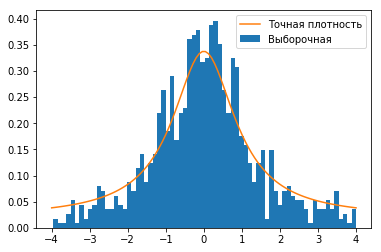

In [8]:
x = np.linspace(-4, 4, 100)
plt.hist(a, bins=70, density=True, label='Выборочная')
plt.plot(x, dist.pdf(x)+(2*np.arctan(-4)/3.1415926+1)/8, label='Точная плотность')
plt.legend()
plt.show()

# _Task 4_

Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

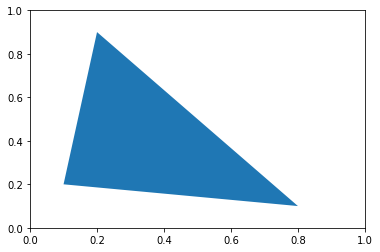

In [9]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]))
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

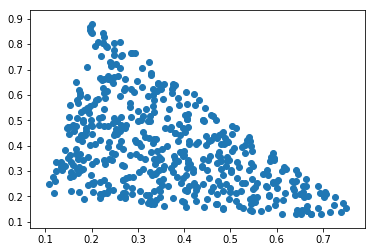

In [10]:
rand=np.random.rand(500,2)
s=rand.sum(axis=1)
m=s>1
np.place(rand[:,0], m, 1-rand[m][:,0])
np.place(rand[:,1], m, 1-rand[m][:,1])
A=np.array([7/np.sqrt(50),1/np.sqrt(50),-1/np.sqrt(50),7/np.sqrt(50)]).reshape(2,2)
rand=np.matmul(A,rand.T).T
rand=rand*np.sqrt(50)/10+np.array([0.1,0.2])
plt.scatter(rand[:,0],rand[:,1])
plt.show()

# _Task 5_

Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

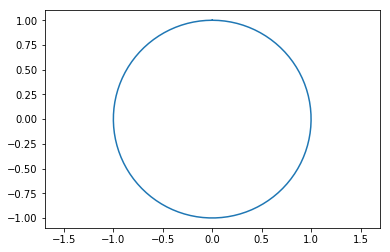

In [11]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

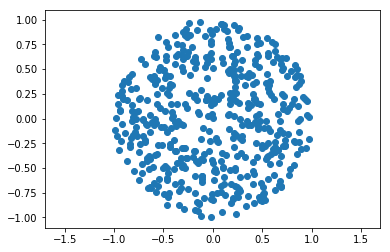

In [12]:
rand=np.random.rand(500,2)
x=np.sqrt(rand[:,1])*np.cos(2*np.pi*rand[:,0])
y=np.sqrt(rand[:,1])*np.sin(2*np.pi*rand[:,0])
plt.scatter(x,y)
plt.axis('equal')
plt.show()

# _Task 6_

Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

In [59]:
def random_walk_1d(n=100):
    walk = [0]
    for i in range(n):
        #direction = (np.random.rand() > 0.5) * 2 - 1
        direction = np.random.choice([-1, 1])
        if np.abs(walk[-1]) > n - i - 1:
            if np.sign(direction * np.sign(walk[-1])) == 1:
                direction *= -1
        walk += [walk[-1] + direction]
    return walk


In [60]:
def random_walk_2d(n=100):
    walk_x = random_walk_1d(n)
    walk_y = random_walk_1d(n)
    #print (walk_x)
    #print (walk_y)
    random_walk = []
    for i in range(1,n+1):
        if (np.random.rand() > 0.5):
            random_walk.append([walk_x[i-1], walk_y[i]])
            random_walk.append([walk_x[i], walk_y[i]])
        else:
            random_walk.append([walk_x[i], walk_y[i-1]])
            random_walk.append([walk_x[i], walk_y[i]])
    return random_walk
                            

In [61]:
print (random_walk_2d ())

[[0, 1], [1, 1], [1, 2], [2, 2], [2, 1], [1, 1], [0, 1], [0, 2], [0, 1], [-1, 1], [0, 1], [0, 0], [-1, 0], [-1, 1], [-1, 2], [-2, 2], [-2, 3], [-1, 3], [0, 3], [0, 4], [0, 5], [-1, 5], [-2, 5], [-2, 6], [-3, 6], [-3, 5], [-4, 5], [-4, 4], [-4, 3], [-5, 3], [-4, 3], [-4, 2], [-4, 1], [-3, 1], [-3, 2], [-4, 2], [-4, 1], [-3, 1], [-2, 1], [-2, 0], [-2, -1], [-1, -1], [-1, 0], [-2, 0], [-3, 0], [-3, -1], [-3, -2], [-4, -2], [-4, -1], [-3, -1], [-2, -1], [-2, 0], [-3, 0], [-3, -1], [-4, -1], [-4, 0], [-4, -1], [-3, -1], [-3, 0], [-2, 0], [-1, 0], [-1, 1], [-1, 2], [-2, 2], [-3, 2], [-3, 3], [-4, 3], [-4, 2], [-3, 2], [-3, 1], [-3, 0], [-4, 0], [-3, 0], [-3, 1], [-2, 1], [-2, 2], [-2, 3], [-3, 3], [-4, 3], [-4, 2], [-4, 3], [-5, 3], [-6, 3], [-6, 2], [-7, 2], [-7, 3], [-7, 2], [-6, 2], [-5, 2], [-5, 3], [-5, 2], [-6, 2], [-6, 1], [-7, 1], [-8, 1], [-8, 2], [-8, 3], [-9, 3], [-10, 3], [-10, 4], [-10, 5], [-9, 5], [-8, 5], [-8, 6], [-8, 7], [-7, 7], [-7, 8], [-6, 8], [-6, 9], [-5, 9], [-5, 10]

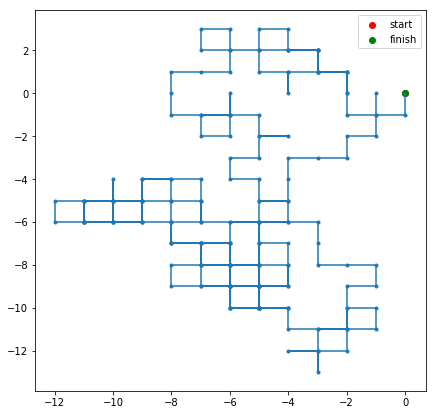

In [62]:
random_walk = np.array(random_walk_2d())
plt.figure(figsize=(7, 7))
plt.plot(random_walk[:, 0], random_walk[:, 1])
plt.scatter(random_walk[:, 0], random_walk[:, 1], marker = '.')
plt.scatter(0, 0, c = 'r', marker = 'o', label = 'start')
plt.scatter(random_walk[-1, 0], random_walk[-1, 1], c = 'g', marker = 'o', label = 'finish')
plt.legend()
plt.show()

# _Task 7_

Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций ```np.sin``` и ```np.cos```. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

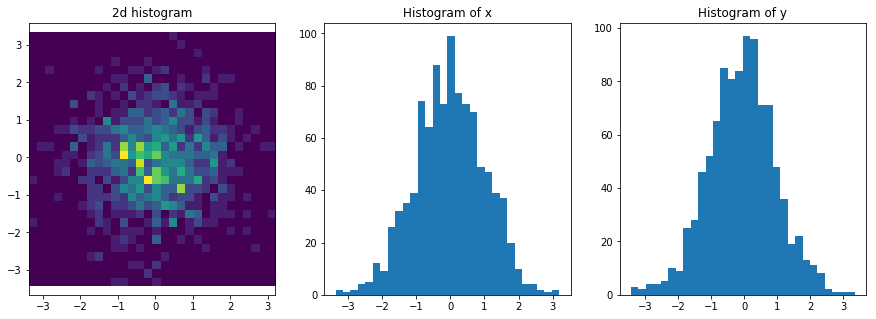

In [27]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

Modified algorithm:

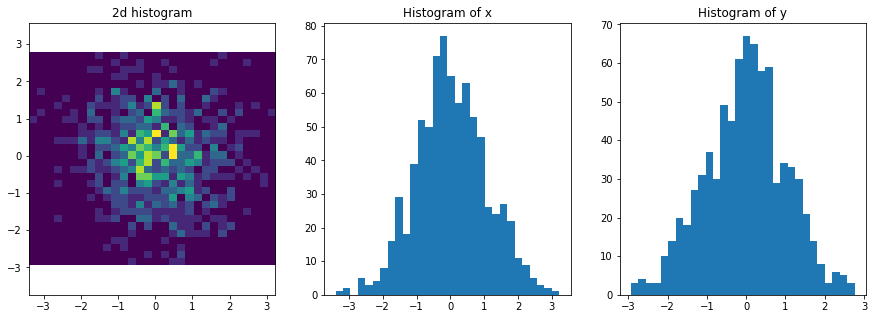

In [28]:
n = 1000
u1, u2 = np.random.rand(2, n) * 2 - 1 # uniform [-1, 1]
s = u1 ** 2 + u2 ** 2
tmp = s[s > 0][s <= 1]
u1 = u1[s > 0][s <= 1]
u2 = u2[s > 0][s <= 1]
r = np.sqrt(-2 * np.log(tmp) / tmp)
x = u1 * r
y = u2 * r

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

In [29]:
mu = np.array([3, 6])
sigma_squared = np.array([[2, 1], [1, 4]])


Transform to another distribution


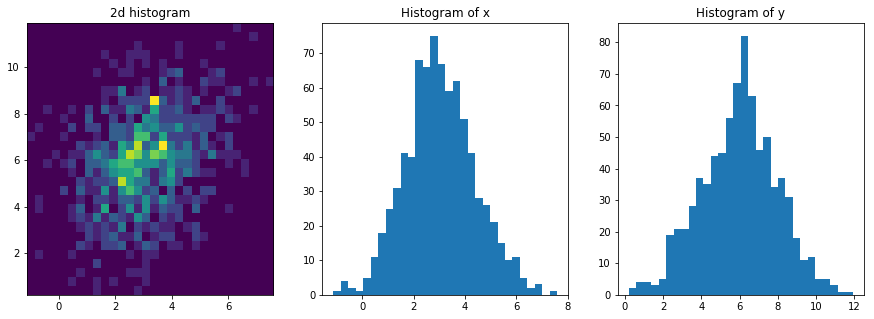

In [30]:
det = 5 
tr = 6    
s = np.sqrt(det)
t = np.sqrt(tr + 2 * s)
sigma = (sigma_squared + s * np.diag([1, 1])) / t

x2 = mu[0] + sigma[0, 0] * x + sigma[0, 1] * y
y2 = mu[1] + sigma[1, 0] * x + sigma[1, 1] * y


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x2, y2, bins=30)
ax[1].hist(x2, bins=30)
ax[2].hist(y2, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
print("\nTransform to another distribution")
plt.show()

# _Task 8_

Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.

In [4]:

B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])


Не могу разобраться с ней 

# _Task 9_

С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число π . Теоретически обоснуйте необходимое число бросаний, чтобы оценить число π с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.

In [55]:
def pi_est (n = 100000):
    total = np.array([np.random.rand(2) for i in range(n)])
    success = total[total[:, 0] ** 2 + total[:, 1] ** 2 <= 1]
    pi = 4 * len(success) / len(total)
    return pi

In [56]:
pi_est()

3.144

# _Task 10_

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

In [16]:
import math


def generator(n):
    B_n = np.sum(np.array([i**n / math.factorial(i) for i in range(100)])) / np.e #Bell number
    
    weights = np.array([i**n / (math.factorial(i) * np.e * B_n) for i in range(1, n + 1)])
    weights_bounded = np.cumsum(np.sort(weights) / np.sum(weights))
    
    rand = np.random.rand()

    for i in range(n):
        if(rand < weights_bounded[i]):
            rand = np.argsort(weights)[i]
            break;
    return rand
    


def split(A):
    n = generator(len(A[:]))
    check_set = np.arange(n)
    choice_set = np.arange(n)
    split_A = np.zeros(len(A[:]))
    for i in range(len(A[:])):
        if (len(check_set[check_set != 0]) < len(A[:]) - i):
            num = choice_set[np.random.randint(0, n)]
            
            split_A[i] = num
            check_set[num] = 0
        elif (len(check_set[check_set != 0]) > 0):
            num = choice_set[check_set != 0][np.random.randint(0, len(check_set[check_set != 0]))]
            split_A[i] = num
            check_set[num] = 0
        else:
            break
        
    return split_A


def avg_num_of_subsets(n):
    A = np.array([np.random.rand(2) for i in range(n)])
    return np.mean(np.array([len(np.unique(split(A))) + 1 for i in range(n)]))


In [17]:
avg_num_of_subsets(100)

29.9

In [18]:
avg_num_of_subsets(50)

17.14

In [19]:
avg_num_of_subsets(10)

6.1